# Final Project Phase 2 Notebook

Aditya Kakade (apk67), Johanna Jung (jj425), Maaya Kanvar (mnk55)

### Research Question

How does the level of debt owed to the World Bank, intellectual property, and balance of payments correlate with the GDP growth rates of countries, and are there distinguishable patterns or differences in this relationship when comparing developed and developing nations?


### Data Overview

We have four data tables for this phase: The GDP data for countries around the world, Loans/debt owed to the World Bank by countries, a dataset containing a list of developed countries (as classified biy the UN), and the Intellectual Property of countries for years 2000 to 2022.

The GDP Dataset details the gross domestic product for individual countries across a set of years. Specifically, the dataset contains years from 1960 to 2022 with the respective GDPs - in USD dollars - for 267 countries around the world.

The loans/debt dataset discusses a given amount of money loaned to a country from the World Bank and what how that money has been handled since. This particular dataset contains 148 countries and their original principal amount,canceled amount, undisbursed amount, disbursed amount, and borrower's obligation.

For the intellectual property dataset it pertains to transactions between residents and non-residents concerning the authorized utilization of intellectual property rights. This encompasses rights like patents, trademarks, copyrights, industrial designs, trade secrets, and franchises. Additionally, it covers the usage of original productions or prototypes, which include copyrights on literature, software, films, and audio recordings, as well as associated rights for live events and various broadcast methods. The monetary values provided in the dataset are presented in contemporary U.S. dollars (World Bank, 2023). 

There is also a datset containing developed countries based on the United Nations classification. This is going to be used to compare if there are any patterns or trends with the dependent variables discussed previously and developing and developed nations.

Link to balance of payments of countries owed to World Bank: https://finances.worldbank.org/Loans-and-Credits/IBRD-Country-wise-Loan-summary/5xqk-t59j

Link to intellectual property: https://data.worldbank.org/indicator/BM.GSR.ROYL.CD?locations=SV

Link to GDP: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2022&start=2022&view=bar

Link to Developed Countries Dataset: https://worldpopulationreview.com/country-rankings/developed-countries


### Data Collection & Cleaning

First, we will import all of the necessary libraries and packages into our notebook

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb as duckdb

Here we are reading in all of our csv files as dataframes.  We have four files:
1) A CSV file representing the amount of money that countries were paid for their intellectual property for years from 1960 - 2022
2) A CSV file representing the GDP of countries for years from 1960 - 2022
3) A CSV file representing various loan statistics including current balance and inital amount regarding countries' debt to the World Bank
4) A CSV file containing all developed countries as classified by the UN, and their Human Development Indexes for 2021 and 2022

CSV files 1, 2, and 3 are all from the World Bank, and CSV file 4 is from the World Population Review.

*In order to import the GDP_Table.csv file, we needed to manually delete rows 1-4, as they had headers and titles that were interfering with panda's ability to parse the file.

In [87]:
int_property_df = pd.read_csv("Intellectual_Property_Table.csv")
gdp_df = pd.read_csv("GDP_Table.csv", delimiter = ",")
debt_df = pd.read_csv("IBRD_Country-wise_Loan_summary.csv")
developed_countries_df = pd.read_csv("developed-countries-2023.csv")


We now look at the shapes of all of our dataframes.  We know that all of our data is heavily based on the country/code -- printing the dataframe's shapes helped us see that the Intellectual Property, GDP, and Debt dataframes had different row amounts. Knowing there are 195 countries, this means that for the Debt dataframe, not all countries have debt data, and for the IP and GDP dataframes, world regions may also be included in addition to just countries as table entries.  This will come into play later in the data cleaning, to ensure we are able to do analysis using all of our variables.

In [88]:
print("Intellectual Property dataframe shape" + str(int_property_df.shape))
print("GDP dataframe shape" + str(gdp_df.shape))
print("Debt dataframe shape" + str(debt_df.shape))
print("Developed Countries dataframe shape" + str(developed_countries_df.shape))


Intellectual Property dataframe shape(271, 67)
GDP dataframe shape(266, 67)
Debt dataframe shape(147, 6)
Developed Countries dataframe shape(66, 3)


In our analysis, we decided that we do not want to consider years before 2000 due to large changes that were happening due to world events such as conflict and large changes in technology.  We want to only consider years after 1999 because our data concerning countries' debt to the World Bank is current, meaning modern times' gdp and debt data will likely be more accurate.

To do this, we put all of our unwanted years in an array, and used this array to drop them from both the GDP dataframe and the Intellectual Property dataframe.  We then saved these filtered dataframes as new csv's after making sure the columns aligned with our expectations.

In [89]:
#years we do not want to consider
unwanted_years = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999']

#reducing GDP dataframe, saving to new csv
filtered_gdp_df = gdp_df.drop(columns=unwanted_years)
print("New GDP DF Columns:" + str(filtered_gdp_df.columns))

#saving to new csv file
filtered_gdp_df.to_csv("Filtered_GDP.csv", index=False)

#reducing Intellectual Property dataframe, saving to new csv
filtered_int_prop_df = int_property_df.drop(columns=unwanted_years)
print("New Intellectual Property DF Columns:" + str(filtered_int_prop_df.columns))

#saving to new csv file
filtered_int_prop_df.to_csv("Filtered_Int_Prop.csv", index=False)


New GDP DF Columns:Index(['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')
New Intellectual Property DF Columns:Index(['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')


For the developed countries CSV, we only need the country names and whether they are developed or not.  Since all the countries in the CSV are developed, we can simply drop one of the year colulmns containint the human development index value, and fill the other one with ones to represent a binary variable where 1 = developed and 0 = not developed.

In [90]:
#dropping year columns containing HDI values
developed_countries_df = developed_countries_df.drop(columns = ['Hdi2021','Hdi2020'])

#adding column of all ones
developed_countries_df['developed'] = 1

developed_countries_df.head(10)


,country,developed
0,Switzerland,1
1,Norway,1
2,Iceland,1
3,Hong Kong,1
4,Australia,1
5,Denmark,1
6,Sweden,1
7,Ireland,1
8,Germany,1
9,Netherlands,1


We want to check the datatypes of our columns in each of our dataframes, to ensure that they are satisfactory for later analysis and comparison.

In [91]:
print("GDP df datatypes\n" + str(filtered_gdp_df.dtypes))
print("Intellectual Property df datatypes\n" + str(filtered_int_prop_df.dtypes))
print("Debt df datatypes\n" + str(debt_df.dtypes))
print("Developed Countries datatypes\n" + str(developed_countries_df.dtypes))

GDP df datatypes
Country_Name       object
Country_Code       object
Indicator_Name     object
Indicator_Code     object
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
dtype: object
Intellectual Property df datatypes
Country_Name    object
Country_Code    object
Series_Name     object
Series_Code     object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
20

Since all of the datatypes look good -- year columns containing numbers representing money are floats and all other columns are objects -- we can move onto missing data.

For the GDP and Intellectual dataframes specifically, cells with missing data are represented using "..".  For future analysis, we want to replace these values with 0 since these cells represent monetary values.  The debt datafram already uses 0 rather than NaN so it does ot need this.

In [92]:
#Fill nans in GDB and Intellectual Property dataframes with 0
filtered_gdp_df.replace(np.nan, 0, inplace=True)

filtered_int_prop_df.replace(np.nan, 0, inplace=True)

In order to later compare and analyze countries' gdp and intellectual property in relation to debt and developed status, we wnat to add the contents of the Debt and Developed Country dataframes to both the GDP and Intellectual Property dataframes.  Since we only want to analyze countries which we have all variables for as stated before, we will Inner Join on the Debt dataframe since it has the least amount of rows and therefore countries.  This will prevent duplicated countries & countries with no data pertaining to some of our variables.

In [93]:
#inner joining GDP df on Debt df
gdp_debt_df = duckdb.sql("""SELECT * FROM
                         debt_df INNER JOIN filtered_gdp_df
                         ON debt_df.Country = filtered_gdp_df.Country_Name""").df()

#Dropping the redundant Country_Name column
gdp_debt_df = gdp_debt_df.drop("Country_Name", axis = 1)

#inner joining Intellectual Property df on Debt df
int_property_debt_df = duckdb.sql("""SELECT * FROM
                         debt_df INNER JOIN filtered_int_prop_df
                         ON debt_df.Country = filtered_int_prop_df.Country_Name""").df()

#Dropping the redundant Country_Name column
int_property_debt_df = int_property_debt_df.drop("Country_Name", axis = 1)

print(gdp_debt_df.head(5))
print(int_property_debt_df.head(5))


               Country  Original Principal Amount  Cancelled Amount  \
0              Albania               2.032160e+09      1.402591e+08   
1            Argentina               4.246665e+10      4.680851e+09   
2              Armenia               1.224900e+09      4.430277e+07   
3  Antigua and Barbuda               1.200000e+07      7.435746e+06   
4            Australia               4.177300e+08      0.000000e+00   

   Undisbursed Amount  Disbursed Amount  Borrower's Obligation Country_Code  \
0        7.465856e+08      1.082344e+09           8.740135e+08          ALB   
1        5.289592e+09      3.300022e+10           9.498279e+09          ARG   
2        1.301590e+08      1.053062e+09           9.671751e+08          ARM   
3        5.161400e+04      4.512640e+06           4.012867e+06          ATG   
4        0.000000e+00      4.177300e+08          -2.000000e-02          AUS   

      Indicator_Name  Indicator_Code          2000  ...          2013  \
0  GDP (current US$)  NY.

Now we will add the Developed Countries dataframe to the two dataframes we just created above.  We will left join the developed_countries_df on these dataframes, as sql will automatically just put the countries that are not in the developed_countries_df as having a value of NaN for the developed column.

In [94]:
#adding developed countries df to gdp_debt_df
gdp_dbt_dev_df = duckdb.sql("""SELECT * FROM
                         gdp_debt_df LEFT JOIN developed_countries_df
                         ON gdp_debt_df.Country = developed_countries_df.country""").df()

gdp_dbt_dev_df = gdp_dbt_dev_df.drop(columns = 'country')

#adding developed countries df to int_prop_dbt_dev_df
int_prop_dbt_dev_df = duckdb.sql("""SELECT * FROM
                         int_property_debt_df LEFT JOIN developed_countries_df
                         ON int_property_debt_df.Country = developed_countries_df.country""").df()

int_prop_dbt_dev_df = int_prop_dbt_dev_df.drop(columns = 'country')

print(gdp_dbt_dev_df.head(5))
print(int_prop_dbt_dev_df.head(5))

               Country  Original Principal Amount  Cancelled Amount  \
0              Albania               2.032160e+09      1.402591e+08   
1              Armenia               1.224900e+09      4.430277e+07   
2  Antigua and Barbuda               1.200000e+07      7.435746e+06   
3           Azerbaijan               3.479300e+09      5.324351e+08   
4              Burundi               4.800000e+06      0.000000e+00   

   Undisbursed Amount  Disbursed Amount  Borrower's Obligation Country_Code  \
0         746585590.2      1.082344e+09           8.740135e+08          ALB   
1         130159016.0      1.053062e+09           9.671751e+08          ARM   
2             51614.0      4.512640e+06           4.012867e+06          ATG   
3         108026863.4      2.838838e+09           1.250364e+09          AZE   
4                 0.0      4.800000e+06           0.000000e+00          BDI   

      Indicator_Name  Indicator_Code          2000  ...          2014  \
0  GDP (current US$)  NY.

Now, we will fill the NaN's in the 'developed' columns of these two data frames with 0s, so it is a binary column where 0 = not developed and 1 = developed.

In [95]:
#filling NaN values in 'developed' columns of both dataframes with 0
gdp_dbt_dev_df['developed'].fillna(value= 0, inplace = True)
int_prop_dbt_dev_df['developed'].fillna(value= 0, inplace = True)

print(gdp_dbt_dev_df.head(5))
print(int_prop_dbt_dev_df.head(5))

               Country  Original Principal Amount  Cancelled Amount  \
0              Albania               2.032160e+09      1.402591e+08   
1              Armenia               1.224900e+09      4.430277e+07   
2  Antigua and Barbuda               1.200000e+07      7.435746e+06   
3           Azerbaijan               3.479300e+09      5.324351e+08   
4              Burundi               4.800000e+06      0.000000e+00   

   Undisbursed Amount  Disbursed Amount  Borrower's Obligation Country_Code  \
0         746585590.2      1.082344e+09           8.740135e+08          ALB   
1         130159016.0      1.053062e+09           9.671751e+08          ARM   
2             51614.0      4.512640e+06           4.012867e+06          ATG   
3         108026863.4      2.838838e+09           1.250364e+09          AZE   
4                 0.0      4.800000e+06           0.000000e+00          BDI   

      Indicator_Name  Indicator_Code          2000  ...          2014  \
0  GDP (current US$)  NY.

### Summary Statistics

In [96]:
#checking the columns existing in the df to conduct the data analysis
print(gdp_dbt_dev_df.columns)

Index(['Country', 'Original Principal Amount', 'Cancelled Amount',
       'Undisbursed Amount', 'Disbursed Amount', 'Borrower's Obligation',
       'Country_Code', 'Indicator_Name', 'Indicator_Code', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', 'developed'],
      dtype='object')


We are now going to collect basic summary statistics on our dataset containing Countries' GDP & Debt to The World Bank.


In [97]:
#collecting the summary statistics related to GDP & Debt
print(gdp_dbt_dev_df.describe(include='all'))


        Country  Original Principal Amount  Cancelled Amount  \
count       135               1.350000e+02      1.350000e+02   
unique      135                        NaN               NaN   
top     Grenada                        NaN               NaN   
freq          1                        NaN               NaN   
mean        NaN               6.013611e+09      7.263827e+08   
std         NaN               1.405140e+10      1.819805e+09   
min         NaN               2.600000e+06      0.000000e+00   
25%         NaN               1.455000e+08      2.941172e+06   
50%         NaN               6.260000e+08      6.564928e+07   
75%         NaN               4.227310e+09      4.828613e+08   
max         NaN               7.918036e+10      1.390867e+10   

        Undisbursed Amount  Disbursed Amount  Borrower's Obligation  \
count         1.350000e+02      1.350000e+02           1.350000e+02   
unique                 NaN               NaN                    NaN   
top               

We will do the same for the dataset pertaining to Intellectual Property & Debt

In [98]:
#collecting the summary statistics related to Intellectual Property & Debt
print(gdp_dbt_dev_df.describe(include='all'))

        Country  Original Principal Amount  Cancelled Amount  \
count       135               1.350000e+02      1.350000e+02   
unique      135                        NaN               NaN   
top     Grenada                        NaN               NaN   
freq          1                        NaN               NaN   
mean        NaN               6.013611e+09      7.263827e+08   
std         NaN               1.405140e+10      1.819805e+09   
min         NaN               2.600000e+06      0.000000e+00   
25%         NaN               1.455000e+08      2.941172e+06   
50%         NaN               6.260000e+08      6.564928e+07   
75%         NaN               4.227310e+09      4.828613e+08   
max         NaN               7.918036e+10      1.390867e+10   

        Undisbursed Amount  Disbursed Amount  Borrower's Obligation  \
count         1.350000e+02      1.350000e+02           1.350000e+02   
unique                 NaN               NaN                    NaN   
top               

For both of these datasets, the summary statistics are not able to provide too great of an insight into the data -- yes, we are able to see aspects such as the fact that the mean principal loan amount accross all countries in our dataset was $6.013611e+09, but because we want to look at the relation between Intellectual Property and/or GDP in relation to Debt over a period of years, depending on the binary variable that determines whether or not a country is developed, we need to do further data exploration through graphs and plots.

### Exploratory Data Analysis

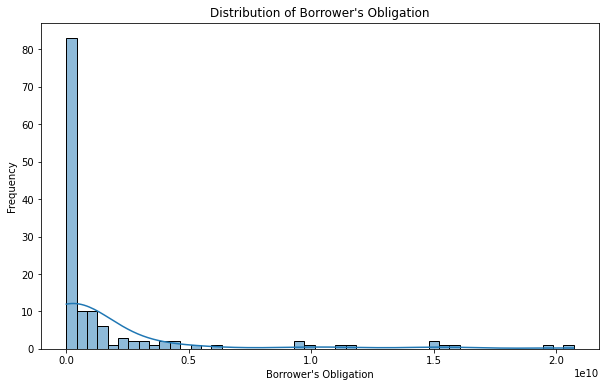

In [99]:
# analyzing the distribution of "Borrower's Obligation" (debt owed by country)
plt.figure(figsize=(10,6))
sns.histplot(gdp_dbt_dev_df['Borrower\'s Obligation'], kde=True)
plt.title('Distribution of Borrower\'s Obligation')
plt.xlabel('Borrower\'s Obligation')
plt.ylabel('Frequency')
plt.show()

Now we will look at the relationship between Borrower's Obligation and GDP. Since our dataset contained a large amount of years for this relationship, and we do not want to make the scatterplot too difficult to read, we randomly selected the year 2020 to view for the relationship between these two variables.

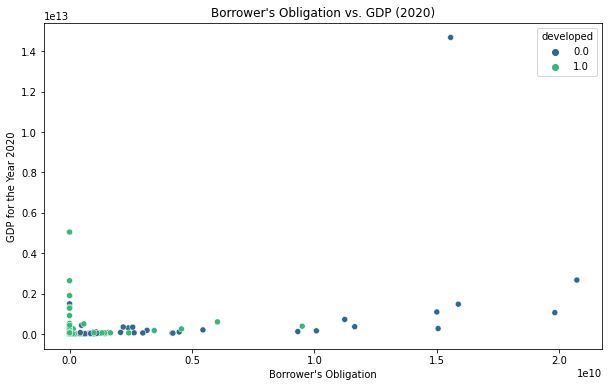

In [100]:
# plotting a scatter plot to show the relation between "Borrower's Obligation" and "GDP" for the year 2020 as a random selection year
# and color-coded based on development status
plt.figure(figsize=(10,6))
sns.scatterplot(data=gdp_dbt_dev_df, x='Borrower\'s Obligation', y='2020', hue='developed', palette="viridis")
plt.title('Borrower\'s Obligation vs. GDP (2020)')
plt.xlabel('Borrower\'s Obligation')
plt.ylabel('GDP for the Year 2020')
plt.show()


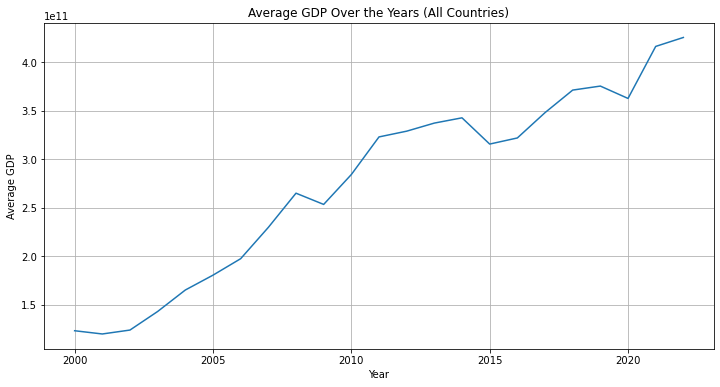

In [101]:
# plotting a line plot to show the average GDP across years for all countries
avg_gdp_per_year = gdp_dbt_dev_df.loc[:, '2000':'2022'].mean()
plt.figure(figsize=(12,6))
avg_gdp_per_year.plot()
plt.title('Average GDP Over the Years (All Countries)')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.grid(True)
plt.show()


In [102]:
# creating a correlation matrix between "Year" (GDP) and the "Borrower's Obligation"
year_columns = [str(year) for year in range(2000, 2023)]
year_loan = ['Borrower\'s Obligation'] + year_columns
correlation_matrix = gdp_dbt_dev_df[year_loan].corr()
borrower_year_correlation = correlation_matrix.loc['Borrower\'s Obligation', year_columns]
print(borrower_year_correlation)


2000    0.143268
2001    0.163229
2002    0.169293
2003    0.164361
2004    0.174351
2005    0.212819
2006    0.256752
2007    0.299385
2008    0.308921
2009    0.321521
2010    0.366162
2011    0.379610
2012    0.386002
2013    0.407380
2014    0.415933
2015    0.416570
2016    0.412665
2017    0.424513
2018    0.411228
2019    0.413993
2020    0.398697
2021    0.402985
2022    0.421868
Name: Borrower's Obligation, dtype: float64


In [103]:
# grouping by 'developed' column to get mean of debt and GDP for 2020
grouped = gdp_dbt_dev_df.groupby('developed').agg({'Borrower\'s Obligation':'mean', '2020':'mean'})
grouped.columns = ['Average Debt', 'Average GDP 2020']
print(grouped)

           Average Debt  Average GDP 2020
developed                                
0.0        2.172868e+09      3.146237e+11
1.0        8.060129e+08      4.617079e+11


In [104]:
# separating the dataframes for developed and developing nations to make it easier to see difference
developed_df = gdp_dbt_dev_df[gdp_dbt_dev_df['developed'] == 1.0]
developing_df = gdp_dbt_dev_df[gdp_dbt_dev_df['developed'] == 0.0]



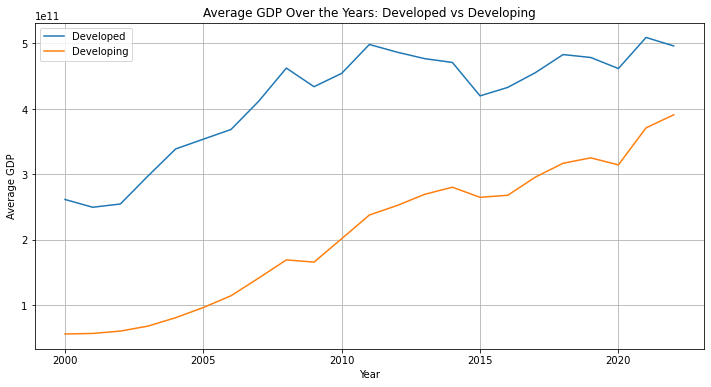

In [105]:
#plotting a line graph of the average GDP growth over the years for developed vs developing countries
plt.figure(figsize=(12,6))
developed_df.loc[:, '2000':'2022'].mean().plot(label='Developed')
developing_df.loc[:, '2000':'2022'].mean().plot(label='Developing')
plt.title('Average GDP Over the Years: Developed vs Developing')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.legend()
plt.grid(True)
plt.show()

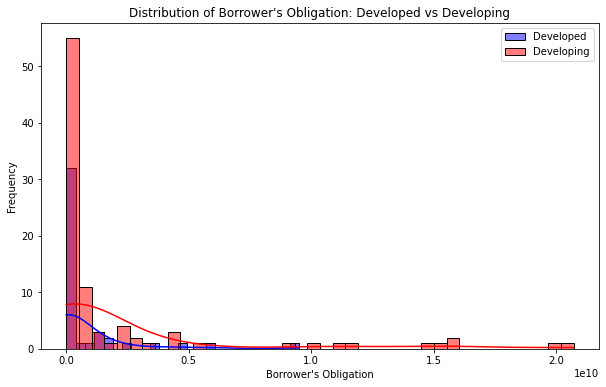

In [106]:
#analyzing the distribution of Borrower's Obligation for developed vs developing countries in histogram
plt.figure(figsize=(10,6))
sns.histplot(developed_df['Borrower\'s Obligation'], kde=True, label='Developed', color='blue')
sns.histplot(developing_df['Borrower\'s Obligation'], kde=True, label='Developing', color='red')
plt.title('Distribution of Borrower\'s Obligation: Developed vs Developing')
plt.xlabel('Borrower\'s Obligation')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Data Discussion


#### Motivation
**_Why was the dataset created?_**

The dataset was created to allow for predicting the future of a developed or developing country using key variables linked to economic growth and stability.

**_Who funded the creation of the dataset_**

"It is unclear who funded the creation of the datset, but much of the information has been taken from the World Bank Organization.

#### Composition

**_What do the instances that comprise the dataset represent?_**

The instances that comprise the dataset represent countries and specific economic indicators pertinent to those countries, such as GDP growth rates, intellectual property rights, and World Bank debt.

**_Are there any errors, sources of noise, or redundancies in the dataset?_**

There were potential missing values or inconsistencies which needed to be addressed. In our data cleaning, we filled missing values using interpolation for continuity and dropped any unnecessary columns. It's also possible that there could be redundancies, especially if some countries have been recorded multiple times, which would necessitate deduplication.

**_Is the dataset self-contained, or does it link to or otherwise rely on external resources?_**

The dataset is self-contained, but it does indirectly rely on external resources if that source changes their data, our own data would need to be updated.

**What are the observations (rows) and the attributes (columns)?**

Columns:

Country_Name: The name of the country.

Year: The specific year the data was recorded.

GDP: Represents the Gross Domestic Product growth rate, which is a macroeconomic indicator reflecting the health of a country's economy. It can be positive (indicating economic growth) or negative (indicating economic contraction).

Intellectual_Property: A metric (possibly a score or a binary value) representing the state of intellectual property rights and protections in a country. It might reflect the strength of patents, trademarks, copyrights, and trade secrets in a given nation.

Debt: Indicates the amount or level of World Bank debt a country has. It could reflect the country's external obligations to the World Bank.

Developed: A binary value (1 or 0) indicating whether a country is classified as developed or developing. This categorization could be based on various criteria, including GDP per capita, industrialization, the standard of living, etc.

Each row in the dataset represents a country in a specific year, with its associated economic indicators. The combination of the country's name and year would be the unique identifier for each observation.


Intellectual property:

Although there is Country_code, Series_name, and Series_code, the main columns we are focusing on is Country_name, and the column years 2000 to 2022 (disregarding 1960 to 1999 inclusive). 

The Country_code is the acronym of the country (such as NY for New York), the Series_name is the unit of measurement (charges for the the use of intellectual property payments measured BoP or Current US$), and Series_code is similar to Indicator_code where it is an alphanumeric value that is assigned to a specific time series of data. The Country_name details the countries that we will be analyzing (267 but we removed some based on similarities with other datasets), and the column_years contains the intellectual property value (in US dollars) for each country in a specific year. 

GDP: 

Although there is also Country_code, Indicator_name, and Indicator_code, the main columns we are focusing on is Country_name and the column years 2000 to 2022 (disregarding 1960 to 1999 inclusive). 

The Country_code is the acronym of the country (such as NY for New York), the Indicator_name details the units that the GDP is measured in (Current US$), and the Indicator_code is the unique alphanumeric code that used to reference particular data related to the that particular indicator. The country_name details the countries that we will be analyzing and the column years 2000 to 2022 contain the GDP (in USD dollars) for that specific year and country. 

IBRD Loan Summary:

Although it contains cancelled_amount, undisbursed_amount, disbursed_amount, we plan to focus on country, original_principal_amount and borrowers_obligation. 

Cancelled_amount is the amount of money from the original principal amount that has been forgiven or canceled by the lender, undisbursed_amount is the amount that has been approved to be given but not yet given to the country, disbursed_amount is the amount that has been transferred to the borrowing country. Country is the name of the country that is involved in loan transactions with the World bank, original_principal_amount is the original amount of money that has been loaned to the country, and borrower’s obligation is the amount of money that must be repaid to the bank as part of the loan contract between the country and the bank. All of the units are in US dollars. 

Developed and developing nations: 

Other than the country names there are two columns that are called HDI (human development index) 2020 and 2021 We did not use these columns in our analysis. We simply used the country names because they are all developed countries. 


### Difficulties Faced During Collection

There was lots of data that we had to sort through because there were extra columns and rows in it that had to be removed in order for us to proceed with the data. For example, in the debt csv (loan summary) file there were multiple other columns such as an undistributed amount that was irrelevant to our data collection. This made it difficult to sort through the data and what we actually needed. 

Some of the datasets, though from the same source, had information for some countries and not for others. This made it difficult to categorize the countries as developed vs developing and make standardized comparisons across the datasets. 

The data source did not give context to what the no data (“..”) listed for some countries meant. Thus, we had to go under the assumption that it simply meant no data available 


### Data Limitations

There were a few missing data that would have ‘..’ instead of 0 and NaN. As a result, we had to fill in the spaces with NaN to account for the lack of data. 

We also noticed that some of the csv files had more countries than others (one had over 200 while another had around 100); we combatted this problem by doing INNER JOIN and using ON so that we only had countries that were common to multiple csv files, in order to ensure all of the countries we were analyzing had all relevant data points (columns associated with GDP, Debt, Intellectual Property, & Developed/Developing).

In our analysis, we are only considering years from the 21st century.  This ignores the context that the data from before these years might have had when it comes to GDP, Debt, and Intellectual property.

We also are only considering countries' based on pure numbers relating to GDP, Debt, and Intellectual Property Charges -- this means that we are ignoring other factors such as political differences, conflicts, and geographic location that might also have large impacts on a country's loan to the world bank.

Finally, we use a binary classification when classifying countries into developed/developing.  This does not account for the nuances that exist when it comes to countries' human development indexes, which is the score used to classify them in a category.  Even though this classfication was done by the UN, there are also many subcategories such as 'more developed' and 'less developed' that may have provided greater insight.


### Questions For Reviewers

For our research question, do you have any general feedback regarding our independent and dependent variablesIs there a better way for us to clean or organize the data? 

Should we continue to carry out bivariate statistics (i.e. mean, standard deviation, etc.) comparing the developed versus developing (sticking to the research question) or should we analyze between individual countries as well?

For our research question, do you have any general feedback for our dependent variables such as things that we could add or remove (in terms of feasibility with the assignment)?

Is there a better visualization for the correlation matrix? 
